In [2]:

import cv2
import os

def get_images(image_dir, label_dir):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, filename)
        label_filename = '\\' + filename[:-4] + '.txt'
        label_path = os.path.join(label_dir + label_filename)
        image = (cv2.imread(image_path))
        images.append(image)
        with open(label_path, 'r') as f:
            label_data = f.readlines() 
            labelz = []
            for line in label_data:
                label = line.strip().split(" ")
                label = int(label[0])
                labelz.append(label)
            labels.append(labels)
    return images, labels

train_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\train\images"
test_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\test\images"
valid_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\valid\images"
train_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\train\labels"
test_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\test\labels"
valid_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\valid\labels"

train_im, train_lab = get_images(train_image_dir, train_label_dir)
test_im, test_lab = get_images(test_image_dir, test_label_dir)
val_im, val_lab = get_images(valid_image_dir, valid_label_dir)

sample_image = cv2.imread(r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\train\images\c46bf04050a2a9323dfe563e8813602f_jpg.rf.3c67770c7bc1ae2f34811acc4fea44c1.jpg")


In [3]:

import numpy as np
def create_green_mask(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  
    lower_green = np.array([40, 40, 40])  
    upper_green = np.array([90, 255, 255]) 

    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

    green_image = cv2.bitwise_and(image, image, mask=green_mask)

    return green_mask, green_image

mask, green_image = create_green_mask(sample_image)


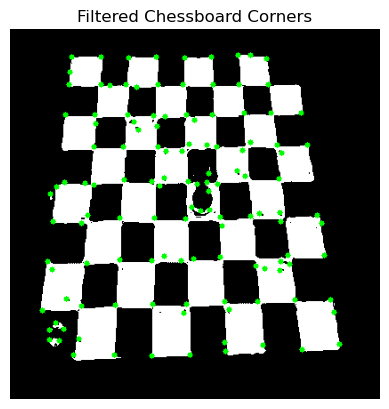

In [5]:

import matplotlib.pyplot as plt
mask, green_image = create_green_mask(sample_image)

mask = mask.copy()

def Harris_corner_detector(image, threshold):
    processed_image = image.copy()
    if len(processed_image.shape) == 2 or processed_image.shape[2] == 1:
        processed_image = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2BGR)
    gray = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    
    dst = cv2.cornerHarris(gray, 2, 5, 0.04)
    dst = cv2.dilate(dst, None)
    
    corners = np.argwhere(dst > threshold * dst.max())
    
    corners = [tuple(c[::-1]) for c in corners] 
    
    return processed_image, corners

def filter_chessboard_corners(corners, min_distance):
    filtered_corners = []

    for corner in corners:
        if all(np.linalg.norm(np.array(corner) - np.array(fc)) > min_distance for fc in filtered_corners):
            filtered_corners.append(corner)

    return filtered_corners



image = mask  
threshold = 0.1 

result_image, corners = Harris_corner_detector(image, threshold)
best_image = result_image.copy()

min_distance = 10  
filtered_corners = filter_chessboard_corners(corners, min_distance)


for corner in filtered_corners:
    cv2.circle(result_image, corner, 3, (0, 255, 0), -1)  

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Chessboard Corners')
plt.axis('off')
plt.show()



Lowest Y points: [(256, 29), (69, 31), (102, 31), (164, 31), (226, 31)]
Highest Y points: [(159, 367), (202, 366), (117, 366), (71, 366), (242, 362)]
Lowest X points: [(36, 316), (42, 261), (44, 349), (45, 185), (48, 216)]
Highest X points: [(370, 354), (364, 318), (353, 254), (350, 218), (334, 130)]


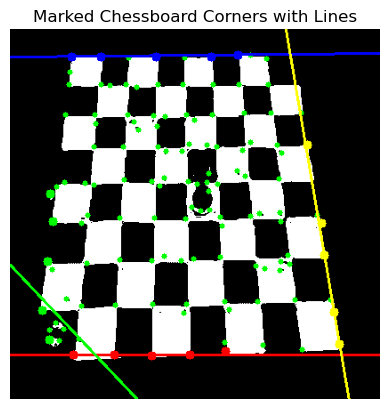

{'lowest_y': (-5.535669213862537e-17, 31.000000000000007), 'highest_y': (5.398175483714891e-16, 365.99999999999983), 'lowest_x': (-8.33333333333334, 614.3333333333336), 'highest_x': (5.87443946188343, -1819.8385650224288)}


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# Assuming result_image and filtered_corners are defined
# Define how many points you want to use for line fitting
num_points = 5  # Desired number of points
distance_threshold = 30  # Minimum distance between points

def filter_points(points, threshold):
    filtered_points = []
    for point in points:
        if all(np.linalg.norm(np.array(point) - np.array(existing_point)) >= threshold for existing_point in filtered_points):
            filtered_points.append(point)
        if len(filtered_points) == num_points:
            break
    return filtered_points

# Sort corners by y-coordinate
sorted_by_y = sorted(filtered_corners, key=lambda corner: corner[1])  # Sort by y
lowest_y_points = filter_points(sorted_by_y, distance_threshold)  # Points with lowest y
highest_y_points = filter_points(sorted_by_y[::-1], distance_threshold)  # Points with highest y

# Sort corners by x-coordinate
sorted_by_x = sorted(filtered_corners, key=lambda corner: corner[0])  # Sort by x
lowest_x_points = filter_points(sorted_by_x, distance_threshold)  # Points with lowest x
highest_x_points = filter_points(sorted_by_x[::-1], distance_threshold)  # Points with highest x
# print(lowest_x_points)

# Print the results
print("Lowest Y points:", lowest_y_points)
print("Highest Y points:", highest_y_points)
print("Lowest X points:", lowest_x_points)
print("Highest X points:", highest_x_points)

# Function to fit a line, draw it and return the equation coefficients
# def draw_line(points, image, color):
#     if len(points) < 2:  # Need at least 2 points to fit a line
#         return None
#     x_coords, y_coords = zip(*points)
#     coefficients = np.polyfit(x_coords, y_coords, 1)  # Linear regression
#     slope, intercept = coefficients
#     print(slope, intercept)

#     height, width = image.shape[:2]
#     # Calculate intersection points with image borders
#     x0, y0 = 0, int(intercept)
#     x1, y1 = width, int(slope * width + intercept)

#     # Draw the line on the image
#     cv2.line(image, (x0, y0), (x1, y1), color, 2)

#     return (slope, intercept)  # Return line equation coefficients for further use
def draw_line(points, image, color, orientation):
    if len(points) < 2:  # Need at least 2 points to fit a line
        return None

    min_error = float('inf')
    best_coefficients = None
    best_slope = None

    # Try excluding two points at a time
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            subset = [p for k, p in enumerate(points) if k != i and k != j]
            x_coords, y_coords = zip(*subset)
            coefficients = np.polyfit(x_coords, y_coords, 1)  # Linear regression
            slope, intercept = coefficients

            # Compute error as the sum of squared residuals
            error = sum((y - (slope * x + intercept)) ** 2 for x, y in subset)

            # Check slope constraint based on orientation
            if orientation == 'horizontal' and abs(slope) >= 1:
                continue
            if orientation == 'vertical' and abs(slope) <= 4:
                continue

            if error < min_error:
                min_error = error
                best_coefficients = (slope, intercept)
                # print(subset)
                # print(best_coefficients)

    if best_coefficients is None:
        # Default to a parallel or perpendicular line through the average point
        x_coords, y_coords = zip(*points)
        avg_x = sum(x_coords) / len(x_coords)
        avg_y = sum(y_coords) / len(y_coords)

        if orientation == 'horizontal':
            slope = 0  # Horizontal line
            intercept = avg_y
        elif orientation == 'vertical':
            slope = 6  # Large slope for near-vertical line
            intercept = -slope * avg_x + avg_y
        best_coefficients = (slope, intercept)

    # slope, intercept = best_coefficients
    if slope == 0:
        best_coefficients = (1e-5, intercept)
    # print(best_coefficients)

    height, width = image.shape[:2]

    if abs(slope) > 1e5:  # Near-vertical line
        x0, y0 = int(-intercept / slope), 0
        x1, y1 = int(-intercept / slope), height
    else:  # Non-vertical line
        x0, y0 = 0, int(intercept)
        x1, y1 = width, int(slope * width + intercept)

#     # Draw the line on the image
#     height, width = image.shape[:2]
# #     # Calculate intersection points with image borders
#     x0, y0 = 0, int(intercept)
#     x1, y1 = width, int(slope * width + intercept)
    cv2.line(image, (x0, y0), (x1, y1), color, 2)

    return best_coefficients


# Collect the equations of the lines
line_equations = {}


# Mark the points and draw lines
line_equations['lowest_y'] = draw_line(lowest_y_points, result_image, (255, 0, 0), 'horizontal')
for point in lowest_y_points:
    cv2.circle(result_image, point, 5, (255, 0, 0), -1)  # Mark lowest Y points in blue

line_equations['highest_y'] = draw_line(highest_y_points, result_image, (0, 0, 255), 'horizontal')
for point in highest_y_points:
    cv2.circle(result_image, point, 5, (0, 0, 255), -1)  # Mark highest Y points in red

line_equations['lowest_x'] = draw_line(lowest_x_points, result_image, (0, 255, 0), 'vertical')
for point in lowest_x_points:
    cv2.circle(result_image, point, 5, (0, 255, 0), -1)  # Mark lowest X points in green

line_equations['highest_x'] = draw_line(highest_x_points, result_image, (0, 255, 255), 'vertical')
for point in highest_x_points:
    cv2.circle(result_image, point, 5, (0, 255, 255), -1)  # Mark highest X points in yellow

# Display the image with marked points and lines
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Marked Chessboard Corners with Lines')
plt.axis('off')
plt.show()

print(line_equations)


In [8]:
x = [36, 46, 48]
y = [314, 205, 371]
licznik = 0
mianownik = 0
for i in range(3):
    licznik +=((x[i]-np.average(x))*(y[i]-np.average(y)))
    mianownik += (x[i]-np.average(x))**2
alfa = licznik/mianownik
beta = np.average(y) - alfa*np.average(x)
print(alfa, beta)


-0.2983870967741938 309.5967741935484


In [9]:
print (line_equations)

def find_intersection_points(line_equations):
    intersection_points = {}
    for (name1, eq1), (name2, eq2) in [
        (a, b) for a in line_equations.items() for b in line_equations.items() if a != b
    ]:
        try:
            # Handle potential division by zero
            if eq1[0] == eq2[0]:  # Parallel lines
                continue

            x = (eq2[1] - eq1[1]) / (eq1[0] - eq2[0])
            y = eq1[0] * x + eq1[1]

            # Handle potential NaN or infinite values
            if not (np.isfinite(x) and np.isfinite(y)):
                continue

            intersection_points[(name1, name2)] = (int(round(x)), int(round(y)))

        except Exception as e:
            # Handle any unexpected errors
            print(f"Error processing lines {name1} and {name2}: {e}")
            continue

    return intersection_points

# Find the intersection points
intersection_points = find_intersection_points(line_equations)
print(intersection_points)

# Mark the intersection points on the image
for point in intersection_points.values():
    cv2.circle(best_image, point, 5, (255, 255, 0), -1)  # Mark in cyan

# Display the image with intersection points
plt.imshow(cv2.cvtColor(best_image, cv2.COLOR_BGR2RGB))
plt.title('Intersection Points')
plt.axis('off')
plt.show()


{'lowest_y': (-5.535669213862537e-17, 31.000000000000007), 'highest_y': (5.398175483714891e-16, 365.99999999999983), 'lowest_x': (-8.33333333333334, 614.3333333333336), 'highest_x': (5.87443946188343, -1819.8385650224288)}
{('lowest_y', 'highest_y'): (-562860381378193792, 62), ('lowest_y', 'lowest_x'): (70, 31), ('lowest_y', 'highest_x'): (315, 31), ('highest_y', 'lowest_y'): (-562860381378193792, 62), ('highest_y', 'lowest_x'): (30, 366), ('highest_y', 'highest_x'): (372, 366), ('lowest_x', 'lowest_y'): (70, 31), ('lowest_x', 'highest_y'): (30, 366), ('lowest_x', 'highest_x'): (171, -813), ('highest_x', 'lowest_y'): (315, 31), ('highest_x', 'highest_y'): (372, 366), ('highest_x', 'lowest_x'): (171, -813)}


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'circle'
> Overload resolution failed:
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type
>  - Can't parse 'center'. Sequence item with index 0 has a wrong type


[(372, 366), (70, 31), (315, 31), (30, 366)]


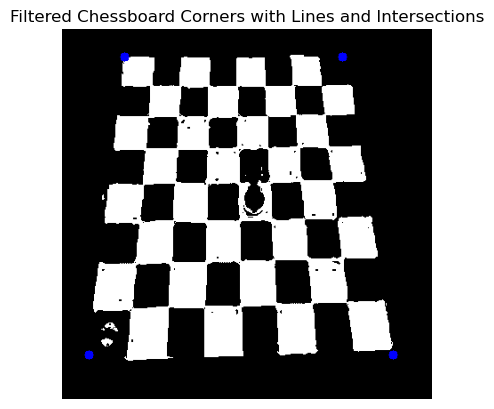

Top Left: (70, 31)
Top Right: (315, 31)
Bottom Left: (30, 366)
Bottom Right: (372, 366)


In [13]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming intersection_points is already defined
# Define boundaries
min_boundary = -200
max_boundary = 800

intersection_points = intersection_points.values()
# Filter and remove duplicates
filtered_intersection_points = list(set(
    tuple(point) for point in intersection_points 
    if min_boundary <= point[0] <= max_boundary and min_boundary <= point[1] <= max_boundary
))

print(filtered_intersection_points)

# Mark the filtered intersections on the image
for point in filtered_intersection_points:
    cv2.circle(best_image, (int(point[0]), int(point[1])), 5, (255, 0, 0), -1)  # Mark in white

# Display the image with lines and intersections
plt.imshow(cv2.cvtColor(best_image, cv2.COLOR_BGR2RGB))
plt.title('Filtered Chessboard Corners with Lines and Intersections')
plt.axis('off')
plt.show()

# assign lebels to the corners(topleft, topright, bottomleft, bottomright)(0,1,2,3)

# Sort the filtered intersection points by x and y coordinates

# def _lenth_from0_0(intersection_points):
#     sorted_intersection_points = []
#     for point in intersection_points:
#         distance = np.sqrt(point[0]**2 + point[1]**2)
#         sorted_intersection_points.append((point, distance))
#         # do not return distance
#         sorted_intersection_points.sort(key=lambda x: x[1])
#     return sorted_intersection_points

# sorted_intersection_points = _lenth_from0_0(filtered_intersection_points)

# print(sorted_intersection_points)

# # Assign labels to the corners
# topleft = sorted_intersection_points[0][0]
# topright = sorted_intersection_points[1][0]
# bottomleft = sorted_intersection_points[2][0]
# bottomright = sorted_intersection_points[3][0]

# print("Top Left:", topleft)
# print("Top Right:", topright)
# print("Bottom Left:", bottomleft)
# print("Bottom Right:", bottomright)

def assign_corners(points):
    """
    Assigns a set of 4 points to top-left, top-right, bottom-left, and bottom-right.

    Args:
        points (list of tuple): A list of 4 points, where each point is a tuple (x, y).

    Returns:
        dict: A dictionary with keys 'top_left', 'top_right', 'bottom_left', 'bottom_right'.
    """
    if len(points) < 4:
        raise ValueError("At least 4 points are required.")

    # If more than 4 points, reduce to 4 by removing closest pairs
    while len(points) > 4:
        min_distance = float('inf')
        pair_to_remove = None

        # Find the pair of points with the smallest distance
        for i in range(len(points)):
            for j in range(i + 1, len(points)):
                p1, p2 = points[i], points[j]
                distance = ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5
                if distance < min_distance:
                    min_distance = distance
                    pair_to_remove = j  # Index of the second point in the closest pair

        # Remove one of the points in the closest pair
        if pair_to_remove is not None:
            points.pop(pair_to_remove)

    # Sort points first by y-coordinate, then by x-coordinate
    points_sorted = sorted(points, key=lambda p: (p[1], p[0]))

    # Top two points (lowest y-coordinates)
    top_two = points_sorted[:2]
    # Bottom two points (highest y-coordinates)
    bottom_two = points_sorted[2:]

    # Sort top two by x to distinguish left and right
    top_left, top_right = sorted(top_two, key=lambda p: p[0])
    # Sort bottom two by x to distinguish left and right
    bottom_left, bottom_right = sorted(bottom_two, key=lambda p: p[0])

    return {
        "top_left": top_left,
        "top_right": top_right,
        "bottom_left": bottom_left,
        "bottom_right": bottom_right,
    }




points = assign_corners(filtered_intersection_points)
topleft = points['top_left']
topright = points['top_right']
bottomleft = points['bottom_left']
bottomright = points['bottom_right']

print("Top Left:", topleft)
print("Top Right:", topright)
print("Bottom Left:", bottomleft)
print("Bottom Right:", bottomright)

# without distance from 0,0




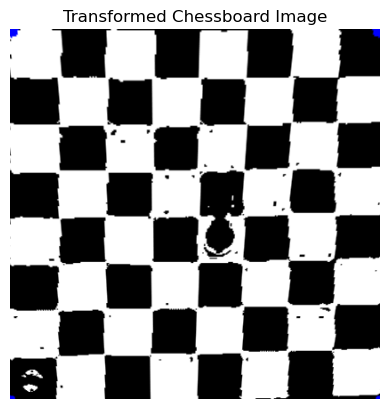

In [14]:

chessboard_boundaries = {
    'top-left': topleft,
    'top-right': topright,
    'bottom-left': bottomleft,
    'bottom-right': bottomright
}


def boundaries_to_vector(boundaries):
    order = ['top-left', 'top-right', 'bottom-right', 'bottom-left']

    vector = []

    for corner in order:
        vector.extend(boundaries[corner])

    return vector

chessboard_vector = boundaries_to_vector(chessboard_boundaries)



target_points = np.array([
    [0, 0],
    [416, 0],
    [416, 416],
    [0, 416]
])

chessboard_points = np.array([chessboard_boundaries[corner] for corner in ['top-left', 'top-right', 'bottom-right', 'bottom-left']])

transformation_matrix = cv2.getPerspectiveTransform(chessboard_points.astype(np.float32), target_points.astype(np.float32))


transformed_image = cv2.warpPerspective(best_image, transformation_matrix, (416, 416))

plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Chessboard Image')
plt.axis('off')
plt.show()


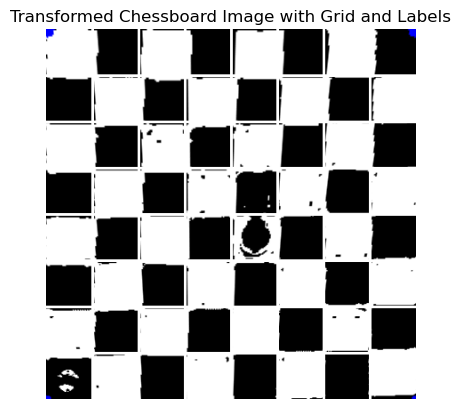

In [15]:

def make_grid(image, rows, cols):
    step_x = image.shape[1] // cols
    step_y = image.shape[0] // rows

    for i in range(1, cols):
        cv2.line(image, (i * step_x, 0), (i * step_x, image.shape[0]), (255, 255, 255), 2)

    for i in range(1, rows):
        cv2.line(image, (0, i * step_y), (image.shape[1], i * step_y), (255, 255, 255), 2)

    return image

rows = 8
cols = 8

grid_image = transformed_image.copy()
grid_image = make_grid(grid_image, rows, cols)





font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (255, 255, 255)
font_thickness = 1

for row in range(rows):
    for col in range(cols):
        x = (col * grid_image.shape[1]) // cols + 10
        y = (row * grid_image.shape[0]) // rows + 20


plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Chessboard Image with Grid and Labels')
plt.axis('off')
plt.show()

In [16]:
import numpy as np

def get_grid_intersections(image, rows, cols):
    step_x = image.shape[1] // cols
    step_y = image.shape[0] // rows
    
    intersections = np.zeros((rows + 1, cols + 1, 2), dtype=int)
    
    for i in range(rows + 1):
        for j in range(cols + 1):
            intersections[i, j] = (j * step_x, i * step_y)

    return intersections

rows, cols = 8, 8
intersection_points = get_grid_intersections(transformed_image.copy(), rows, cols)



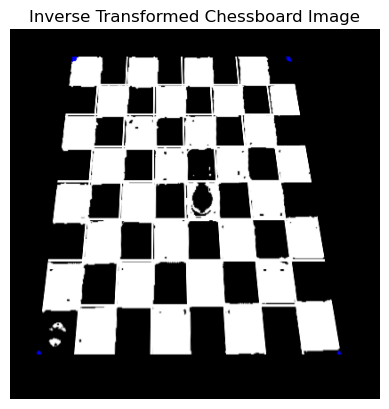

[[[ 70  31]
  [100  31]
  [131  31]
  [161  31]
  [192  31]
  [223  31]
  [253  31]
  [284  31]
  [315  31]]

 [[ 66  62]
  [ 98  62]
  [129  62]
  [161  62]
  [193  62]
  [225  62]
  [256  62]
  [288  62]
  [320  62]]

 [[ 62  95]
  [ 95  95]
  [128  95]
  [161  95]
  [194  95]
  [227  95]
  [260  95]
  [293  95]
  [325  95]]

 [[ 57 131]
  [ 92 131]
  [126 131]
  [160 131]
  [195 131]
  [229 131]
  [263 131]
  [297 131]
  [332 131]]

 [[ 53 170]
  [ 88 170]
  [124 170]
  [160 170]
  [196 170]
  [231 170]
  [267 170]
  [303 170]
  [338 170]]

 [[ 48 213]
  [ 85 213]
  [122 213]
  [159 213]
  [197 213]
  [234 213]
  [271 213]
  [308 213]
  [346 213]]

 [[ 42 259]
  [ 81 259]
  [120 259]
  [159 259]
  [198 259]
  [237 259]
  [276 259]
  [315 259]
  [353 259]]

 [[ 36 310]
  [ 77 310]
  [118 310]
  [158 310]
  [199 310]
  [240 310]
  [281 310]
  [321 310]
  [362 310]]

 [[ 30 366]
  [ 72 366]
  [115 366]
  [158 366]
  [201 366]
  [243 366]
  [286 366]
  [329 366]
  [372 366]]]


In [18]:
import numpy as np
import cv2

original_image = sample_image

inverse_transformation_matrix = cv2.getPerspectiveTransform(target_points.astype(np.float32), chessboard_points.astype(np.float32))
inverse_transformed_image = cv2.warpPerspective(grid_image, inverse_transformation_matrix, (original_image.shape[1], original_image.shape[0]))

plt.imshow(cv2.cvtColor(inverse_transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Inverse Transformed Chessboard Image')
plt.axis('off')
plt.show()

def apply_inverse_transformation_to_intersections(intersection_points, inverse_matrix):
    transformed_points = np.zeros_like(intersection_points)

    for i in range(intersection_points.shape[0]):
        for j in range(intersection_points.shape[1]):
            point = np.array([intersection_points[i, j, 0], intersection_points[i, j, 1], 1])  
            transformed_point = inverse_matrix @ point
            transformed_points[i, j] = transformed_point[:2] / transformed_point[2]

    return transformed_points

new_intersection_points = apply_inverse_transformation_to_intersections(intersection_points, inverse_transformation_matrix)

print(new_intersection_points)



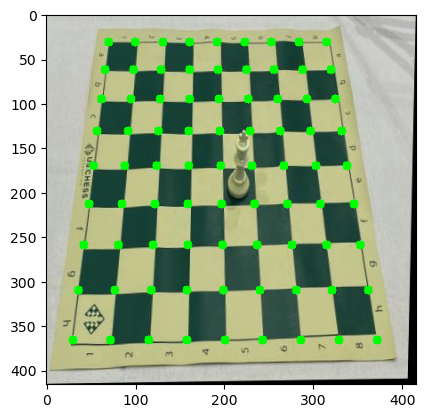

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


marked_image = sample_image.copy()

circle_color = (0, 255, 0)  
circle_radius = 5 
circle_thickness = -1 


for point in new_intersection_points.reshape(-1, 2):  
    x, y = int(point[0]), int(point[1])  
    cv2.circle(marked_image, (x, y), circle_radius, circle_color, circle_thickness)

plt.imshow(cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
import os 
import torchvision.transforms.functional as F
import torch
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import draw_bounding_boxes
import numpy as np
import torchvision.transforms as transforms


train_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\train\images"
test_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\test\images"
valid_image_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\valid\images"
train_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\train\labels"
test_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\test\labels"
valid_label_dir = r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\valid\labels"


transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Resize((100, 50))])
    #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

def get_crop(image_dir, label_dir, padding = 0):
    images = []
    labels = []
    pic = 0
    c=0
    a=0
    for filename in os.listdir(image_dir):
        if pic > 200:
            print(pic)
            print(filename)
            print('C:', c)
            print('A:', a)
        pic+=1
        image_path = os.path.join(image_dir, filename)
        label_filename = '\\' + filename[:-4] + '.txt'
        label_path = os.path.join(label_dir + label_filename)
        image = np.array(cv2.imread(image_path))
        image = image.copy()
        
        mask, green_image = create_green_mask(image)
        mask = mask.copy()
        image_mask = mask  
        threshold = 0.1 

        result_image, corners = Harris_corner_detector(image_mask, threshold)
        best_image = result_image.copy()

        min_distance = 10  
        filtered_corners = filter_chessboard_corners(corners, min_distance)

        sorted_by_y = sorted(filtered_corners, key=lambda corner: corner[1])  # Sort by y
        lowest_y_points = filter_points(sorted_by_y, distance_threshold)  # Points with lowest y
        highest_y_points = filter_points(sorted_by_y[::-1], distance_threshold)  # Points with highest y

        # Sort corners by x-coordinate
        sorted_by_x = sorted(filtered_corners, key=lambda corner: corner[0])  # Sort by x
        lowest_x_points = filter_points(sorted_by_x, distance_threshold)  # Points with lowest x
        highest_x_points = filter_points(sorted_by_x[::-1], distance_threshold)  # Points with highest x

        line_equations = {}

        # Mark the points and draw lines
        line_equations['lowest_y'] = draw_line(lowest_y_points, result_image, (255, 0, 0), 'horizontal')
        line_equations['highest_y'] = draw_line(highest_y_points, result_image, (0, 0, 255), 'horizontal')
        line_equations['lowest_x'] = draw_line(lowest_x_points, result_image, (0, 255, 0), 'vertical')
        line_equations['highest_x'] = draw_line(highest_x_points, result_image, (0, 255, 255), 'vertical')

        intersection_points = find_intersection_points(line_equations)

        intersection_points = intersection_points.values()
        # Filter and remove duplicates
        filtered_intersection_points = list(set(
        tuple(point) for point in intersection_points 
        if min_boundary <= point[0] <= max_boundary and min_boundary <= point[1] <= max_boundary
        ))

        points = assign_corners(filtered_intersection_points)
        topleft = points['top_left']
        topright = points['top_right']
        bottomleft = points['bottom_left']
        bottomright = points['bottom_right']

        # print("Top Left:", topleft)
        # print("Top Right:", topright)
        # print("Bottom Left:", bottomleft)
        # print("Bottom Right:", bottomright)

        
        chessboard_boundaries = {
        'top-left': topleft,
        'top-right': topright,
        'bottom-left': bottomleft,
        'bottom-right': bottomright
        }
        chessboard_vector = boundaries_to_vector(chessboard_boundaries)
        target_points = np.array([
            [0, 0],
            [416, 0],
            [416, 416],
            [0, 416]
        ])
        chessboard_points = np.array([chessboard_boundaries[corner] for corner in ['top-left', 'top-right', 'bottom-right', 'bottom-left']])
        transformation_matrix = cv2.getPerspectiveTransform(chessboard_points.astype(np.float32), target_points.astype(np.float32))
        transformed_image = cv2.warpPerspective(best_image, transformation_matrix, (416, 416))

        grid_image = transformed_image.copy()
        grid_image = make_grid(grid_image, rows, cols)
        intersections = get_grid_intersections(transformed_image.copy(), 8, 8)
        inverse_transformation_matrix = cv2.getPerspectiveTransform(target_points.astype(np.float32), chessboard_points.astype(np.float32))
        inverse_transformed_image = cv2.warpPerspective(grid_image, inverse_transformation_matrix, (image.shape[1], image.shape[0]))
        intersections_new = apply_inverse_transformation_to_intersections(intersections, inverse_transformation_matrix)
        
        # print(filename)
        # if pic >249:
        # for point in intersections_new.reshape(-1, 2):  
        #     x, y = int(point[0]), int(point[1])  
        #     cv2.circle(image, (x, y), circle_radius, circle_color, circle_thickness)

        # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # plt.show()
        # print(intersections_new)
        maping = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:'f', 6:'g', 7:'h'}
        # def get_image_crops(image):
        #     dicti = {}
        #     image = torch.tensor(image).permute(2, 0, 1)
        #     plt.imshow(image.permute(1, 2, 0))
        #     for i in range(8):
        #         for j in range(8):
        #             top = intersections_new[1+i][j][1] - 50
        #             left = intersections_new[1+i][j][0]
        #             height = 50
        #             width = intersections_new[1+i][j+1][0] - left
        #             # print(image.shape)
        #             image2 = f.crop(image, top, left, height, width)
        #             image2 = image2.permute(1, 2, 0).numpy()
        #             transformed = transforms(image2)
        #             dicti[str(maping[i])+str(j+1)] = transformed
        #     return dicti
        image = torch.tensor(image).permute(2, 0, 1)
        # plt.imshow(image.permute(1, 2, 0))
        dicti = {}
        # print(filename)
        for i in range(8):
                for j in range(8):
                    # print(i, j)
                    a+=1
                    # print(intersections_new)
                    top = intersections_new[1+i][j][1] - 80
                    left = intersections_new[1+i][j][0]
                    height = 80
                    width = intersections_new[1+i][j+1][0] - left
                    if width <= 0:
                        intersections_new = torch.tensor(intersections_new).permute(1, 0, 2)
                        top = intersections_new[1+i][j][1] - 80
                        left = intersections_new[1+i][j][0]
                        height = 80
                        width = intersections_new[1+i][j+1][0] - left
                    # print(image.shape)
                    # print(top, left, height, width)
                    # plt.imshow(image.permute(1, 2, 0))
                    # plt.scatter(left, top)
                    # plt.scatter(intersections_new[1+i][j][0], intersections_new[1+i][j][1])
                    # plt.scatter(intersections_new[1+i][j+1][0], intersections_new[1+i][j+1][1])
                    # plt.show()
                    # print(top, left, height, width)
                    image2 = F.crop(image, top, left, height, width)
                    image2 = image2.permute(1, 2, 0).numpy()
                    transformed = transforms(image2)
                    transformed = np.array(transformed.permute(1, 2, 0))
                    dicti[str(maping[i])+str(j+1)] = transformed, 0
                    # print([(key, dicti[key][1]) for key in list(dicti.keys())])
                    # plt.imshow(image.permute(1, 2, 0))
                    # plt.scatter(left, top)
                    # plt.show()

        with open(label_path, 'r') as f:
            # if pic > 249:
            label_data = f.readlines() 
            # label_num = 0
            for line in label_data:
                label = line.strip().split(" ")
                top = int(float(label[2])*416)-padding
                left = int(float(label[1])*416)-padding
                height = int(float(label[8])*416)-top + 2*padding
                width = int(float(label[3])*416)-left + 2*padding
                # print(top, left, height, width)
                bottom_left = (left, top+height)
                bottom_right = (left+width, top+height)
                # if pic == 81:
                #     plt.imshow(image.permute(1, 2, 0))
                #     plt.scatter(left, top)
                #     # plt.scatter(closest_bl[0], closest_bl[1])
                #     # plt.scatter(closest_br[0], closest_br[1])
                #     plt.scatter(bottom_left[0], bottom_left[1])
                #     plt.scatter(bottom_right[0], bottom_right[1])
                #     plt.show()
                #     # print(bottom_left[0])
                #     # print(intersections_new2[5][8])
                #     # print(distances_from_bl.shape)
                #     # print(distances_from_bl)
                #     # print(bottom_left, bottom_right)
                intersections_new2 = list(intersections_new).copy()
                distances_from_bl = np.array([[(intersections_new2[i][j][0]-bottom_left[0])**2 + (intersections_new2[i][j][1]-bottom_left[1])**2 if intersections_new2[i][j][0] <= bottom_left[0] else 1000000 for j in range(9)] for i in range(9)])
                # print(distances_from_bl.shape)
                # print(distances_from_bl)
                closest_bl_idx = np.unravel_index(np.argmin(distances_from_bl), distances_from_bl.shape)[0], np.unravel_index(np.argmin(distances_from_bl), distances_from_bl.shape)[1]
                if closest_bl_idx[1] ==8:
                    closest_bl_idx = closest_bl_idx[0], 7
                if closest_bl_idx[0] ==0:
                    closest_bl_idx = 1, closest_bl_idx[1]
                # print(closest_bl_idx)
                # print(distances_from_bl.shape)
                # print(distances_from_br.shape)
                closest_br_idx = closest_bl_idx[0], closest_bl_idx[1]+1
                closest_bl = intersections_new[closest_bl_idx]
                closest_br = intersections_new[closest_br_idx]
                top, left = closest_bl[1] - 80, closest_bl[0]
                height = 80
                width = closest_br[0] - closest_bl[0]
                image2 = F.crop(image, top, left, height, width)
                image2 = image2.permute(1, 2, 0).numpy()
                transformed = transforms(image2)
                transformed = np.array(transformed.permute(1, 2, 0))
                dicti[str(maping[closest_bl_idx[0]-1])+str(closest_bl_idx[1]+1)] = transformed, int(label[0])
                # print('UPDATE:', [(key, dicti[key][1]) for key in list(dicti.keys())])
                c +=1
                # image2 = F.crop(image, top, left, height, width)
                # image2 = image2.permute(1, 2, 0).numpy()
                # images.append(image2)
                # labels.append(int(label[0]))
                # label_num += 1
        for i in list(dicti.keys()):
            images.append(dicti[i][0])
            labels.append(dicti[i][1])

    return images, labels

# for i in list(dicti.keys()):
#     print(i, dicti[i][1])
#     plt.imshow(dicti[i][0])

im_train, lab_train = get_crop(train_image_dir, train_label_dir)
im_test, lab_test = get_crop(test_image_dir, test_label_dir)
im_val, lab_val = get_crop(valid_image_dir, valid_label_dir)


# im_sorted = sorted(im_train, key = lambda x: x.shape[1])

# for i in im_sorted:
#     print(i.shape)



# def bounding_boxes(image_path, label_path, label_num):
#     image = torch.tensor(cv2.imread(image_path)).permute(2, 0, 1)
#     with open(label_path, 'r') as f:
#         label_data = f.readlines()[label_num].strip().split(" ")
#         x1 = int(float(label_data[1])*416)
#         y1 = int(float(label_data[2])*416)
#         x2 = int(float(label_data[5])*416)
#         y2 = int(float(label_data[6])*416)
#         box = torch.tensor([[x1, y1, x2, y2]])
#         box.round().to(torch.int)
#         image2 = draw_bounding_boxes(image, box, colors = 'red')
#     return image2

# plt.figure(figsize = (12, 12))
# plt.imshow(im_sorted[0][1].permute(1, 2, 0))
# b = bounding_boxes(im_sorted[0][0], im_sorted[0][2], im_sorted[0][3])
# plt.figure(figsize = (12, 12))
# plt.imshow(b.permute(1, 2, 0))

# # plt.figure(figsize = (12, 12))
# # plt.imshow(im_sorted[-1][1].permute(1, 2, 0))
# # b = bounding_boxes(im_sorted[-1][0], im_sorted[-1][2], im_sorted[-1][3])
# # plt.figure(figsize = (12, 12))
# # plt.imshow(b.permute(1, 2, 0))

# transforms = transforms.Compose(
#     [transforms.ToTensor(), transforms.Resize((100, 50))])
#     #  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# # plt.figure(figsize = (12, 12))
# # plt.imshow(im_train[0].permute(1, 2, 0))

# transformed = transforms(im_train[0])
# print(transformed.size())
# plt.figure(figsize = (12, 12))
# plt.imshow(transformed.permute(1, 2, 0))

KeyboardInterrupt: 

In [23]:

def delete_none(images, labels):
    images2 = []
    labels2 = []
    for i in range(len(labels)):
        if labels[i] != 0:
            images2.append(images[i])
            labels2.append(labels[i])
    return images2, labels2

im_train, lab_train = delete_none(im_train, lab_train )
im_test, lab_test = delete_none(im_test, lab_test)
im_val, lab_val = delete_none(im_val, lab_val)


from torch.utils.data import Dataset
class PiecesDataset(Dataset):
    def __init__(self, images, labels, transform = transforms):
        self.im = images
        self.lab = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.lab)
    
    def __getitem__(self, idx):
        image = self.im[idx]
        label = self.lab[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
train_dataset = PiecesDataset(im_train, lab_train)
test_dataset = PiecesDataset(im_test, lab_test)
valid_dataset = PiecesDataset(im_val, lab_val)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False)
valid_dataloader = DataLoader(valid_dataset, batch_size=2, shuffle=False)

NameError: name 'im_train' is not defined

In [22]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()
print(f"Label: {label}")

NameError: name 'train_dataloader' is not defined

In [30]:
import torch.nn as nn
import torch.nn.functional as F


import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)  
        self.conv2 = nn.Conv2d(6, 16, 5)  
       
        self.fc1 = nn.Linear(16 * 22 * 9, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 13)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = torch.flatten(x, 1)  
        x = F.relu(self.fc1(x))  
        x = F.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x


model = Net()

In [206]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10): 

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss:.5f}')
            running_loss = 0.0

print('Finished Training')
torch.save(model.state_dict(), "classification_chess.pth")

[1,   200] loss: 496.91553
[1,   400] loss: 453.00058
[1,   600] loss: 395.86644
[1,   800] loss: 350.74248
[1,  1000] loss: 331.10137
[1,  1200] loss: 323.36705
[1,  1400] loss: 299.52716
[2,   200] loss: 294.55658
[2,   400] loss: 278.82315
[2,   600] loss: 256.34605
[2,   800] loss: 251.55463
[2,  1000] loss: 258.98037
[2,  1200] loss: 252.28698
[2,  1400] loss: 243.15008
[3,   200] loss: 214.05919
[3,   400] loss: 201.90914
[3,   600] loss: 194.43382
[3,   800] loss: 191.66989
[3,  1000] loss: 182.43735
[3,  1200] loss: 188.78809
[3,  1400] loss: 173.63556
[4,   200] loss: 147.11136
[4,   400] loss: 146.22811
[4,   600] loss: 128.44031
[4,   800] loss: 161.44911
[4,  1000] loss: 135.96131
[4,  1200] loss: 141.61010
[4,  1400] loss: 140.04462
[5,   200] loss: 99.48164
[5,   400] loss: 114.30521
[5,   600] loss: 109.31149
[5,   800] loss: 111.94365
[5,  1000] loss: 103.27817
[5,  1200] loss: 106.21777
[5,  1400] loss: 100.19650
[6,   200] loss: 85.33146
[6,   400] loss: 96.59812
[6, 

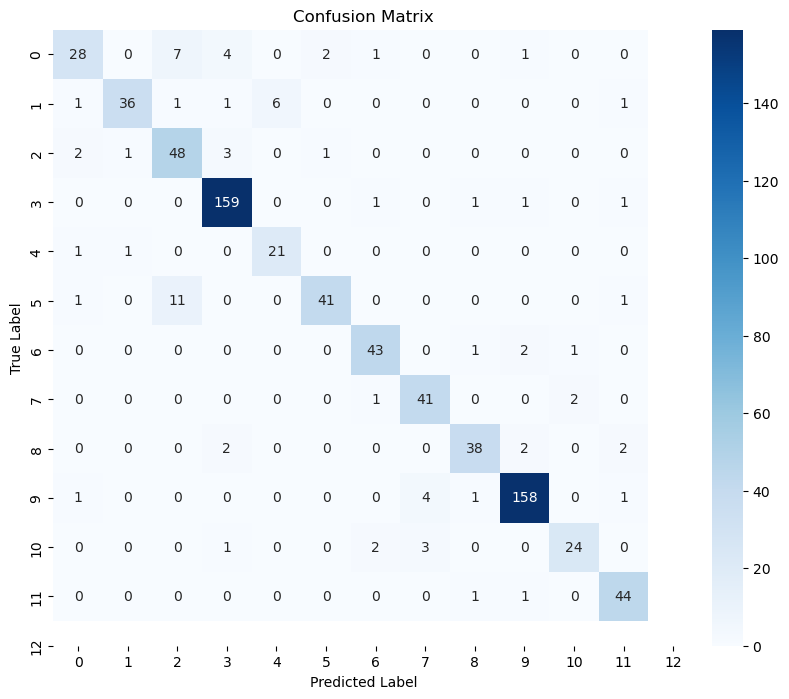

In [207]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, dataloader1, dataloader2, class_names):
    model.eval()  
    all_preds = []
    all_labels = []

    with torch.no_grad():  
        for images, labels in dataloader1:
            outputs = model(images)  
            _, preds = torch.max(outputs, 1)  
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        for images, labels in dataloader2:
            outputs = model(images)  
            _, preds = torch.max(outputs, 1)  
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  
plot_confusion_matrix(model, test_dataloader, valid_dataloader, class_names)

In [27]:


import torchvision.transforms.functional as f

maping = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e', 5:'f', 6:'g', 7:'h'}
def get_image_crops(image_path):
    image = np.array(cv2.imread(image_path))
    image = image.copy()
    dicti = {}
    
        
    mask, green_image = create_green_mask(image)
    mask = mask.copy()
    image_mask = mask  
    threshold = 0.1 

    result_image, corners = Harris_corner_detector(image_mask, threshold)
    best_image = result_image.copy()

    min_distance = 10  
    filtered_corners = filter_chessboard_corners(corners, min_distance)

    sorted_by_y = sorted(filtered_corners, key=lambda corner: corner[1]) 
    lowest_y_points = filter_points(sorted_by_y, distance_threshold)  
    highest_y_points = filter_points(sorted_by_y[::-1], distance_threshold)  

    sorted_by_x = sorted(filtered_corners, key=lambda corner: corner[0])  
    lowest_x_points = filter_points(sorted_by_x, distance_threshold)  
    highest_x_points = filter_points(sorted_by_x[::-1], distance_threshold)  

    line_equations = {}

    line_equations['lowest_y'] = draw_line(lowest_y_points, result_image, (255, 0, 0), 'horizontal')
    line_equations['highest_y'] = draw_line(highest_y_points, result_image, (0, 0, 255), 'horizontal')
    line_equations['lowest_x'] = draw_line(lowest_x_points, result_image, (0, 255, 0), 'vertical')
    line_equations['highest_x'] = draw_line(highest_x_points, result_image, (0, 255, 255), 'vertical')

    intersection_points = find_intersection_points(line_equations)

    intersection_points = intersection_points.values()
    filtered_intersection_points = list(set(
    tuple(point) for point in intersection_points 
    if min_boundary <= point[0] <= max_boundary and min_boundary <= point[1] <= max_boundary
    ))

    points = assign_corners(filtered_intersection_points)
    topleft = points['top_left']
    topright = points['top_right']
    bottomleft = points['bottom_left']
    bottomright = points['bottom_right']

    # print("Top Left:", topleft)
    # print("Top Right:", topright)
    # print("Bottom Left:", bottomleft)
    # print("Bottom Right:", bottomright)

    
    chessboard_boundaries = {
    'top-left': topleft,
    'top-right': topright,
    'bottom-left': bottomleft,
    'bottom-right': bottomright
    }
    chessboard_vector = boundaries_to_vector(chessboard_boundaries)
    target_points = np.array([
        [0, 0],
        [416, 0],
        [416, 416],
        [0, 416]
    ])
    chessboard_points = np.array([chessboard_boundaries[corner] for corner in ['top-left', 'top-right', 'bottom-right', 'bottom-left']])
    transformation_matrix = cv2.getPerspectiveTransform(chessboard_points.astype(np.float32), target_points.astype(np.float32))
    transformed_image = cv2.warpPerspective(best_image, transformation_matrix, (416, 416))

    grid_image = transformed_image.copy()
    grid_image = make_grid(grid_image, rows, cols)
    intersections = get_grid_intersections(transformed_image.copy(), 8, 8)
    inverse_transformation_matrix = cv2.getPerspectiveTransform(target_points.astype(np.float32), chessboard_points.astype(np.float32))
    inverse_transformed_image = cv2.warpPerspective(grid_image, inverse_transformation_matrix, (image.shape[1], image.shape[0]))
    intersections_new = apply_inverse_transformation_to_intersections(intersections, inverse_transformation_matrix)
    for point in intersections_new.reshape(-1, 2):  
            x, y = int(point[0]), int(point[1])  
            cv2.circle(image, (x, y), circle_radius, circle_color, circle_thickness)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    # print(intersections_new)
    image = torch.tensor(image).permute(2, 0, 1)
    # plt.imshow(image.permute(1, 2, 0))
    dicti = {}
    # print(filename)
    for i in range(8):
            for j in range(8):
                # print(i, j)
                # print(intersections_new)
                top = intersections_new[1+i][j][1] - 80
                left = intersections_new[1+i][j][0]
                height = 80
                width = intersections_new[1+i][j+1][0] - left
                if width <= 0:
                    intersections_new = torch.tensor(intersections_new).permute(1, 0, 2)
                    top = intersections_new[1+i][j][1] - 80
                    left = intersections_new[1+i][j][0]
                    height = 80
                    width = intersections_new[1+i][j+1][0] - left
                # print(image.shape)
                # print(top, left, height, width)
                # plt.imshow(image.permute(1, 2, 0))
                # plt.scatter(left, top)
                # plt.scatter(intersections_new[1+i][j][0], intersections_new[1+i][j][1])
                # plt.scatter(intersections_new[1+i][j+1][0], intersections_new[1+i][j+1][1])
                # plt.show()
                # print(top, left, height, width)
                image2 = f.crop(image, top, left, height, width)
                image2 = image2.permute(1, 2, 0).numpy()
                transformed = transforms(image2)
                transformed = np.array(transformed.permute(1, 2, 0))
                dicti[str(maping[i])+str(j+1)] = transformed, 0
    # for key in dicti.keys():
    #     image = torch.tensor(dicti[key][0])
    #     # image = image.permute(2, 0, 1)
    #     plt.imshow(image)
    #     plt.show()
    #     # plt.show()

    return dicti
get_image_crops(r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie\test\d7887071e972604ddf5940d8eb2702e7_jpg.rf.5f20fe9a6c746d488d6d0478828478cb.jpg")
# print([i.shape for i in get_image_crops(test_im[15]).values()])


        

C:\Users\piotr\AppData\Local\Temp\ipykernel_1584\976109827.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_chess.pth"))


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src data type = object is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


C:\Users\piotr\AppData\Local\Temp\ipykernel_1584\403020718.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_chess.pth"))


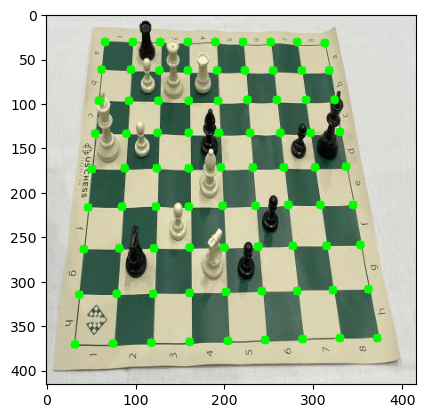

C:\Users\piotr\AppData\Local\Temp\ipykernel_1584\403020718.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


[(0, 'brak'), (0, 'czarna_wieża'), (0, 'brak'), (0, 'brak'), (0, 'brak'), (0, 'brak'), (0, 'brak'), (0, 'brak')]
[(1, 'brak'), (1, 'biały_pionek'), (1, 'biała_królowa'), (1, 'biała_wieża'), (1, 'brak'), (1, 'brak'), (1, 'brak'), (1, 'brak')]
[(2, 'brak'), (2, 'brak'), (2, 'brak'), (2, 'brak'), (2, 'brak'), (2, 'brak'), (2, 'brak'), (2, 'brak')]
[(3, 'biały_król'), (3, 'biały_pionek'), (3, 'brak'), (3, 'brak'), (3, 'brak'), (3, 'brak'), (3, 'czarny_pionek'), (3, 'czarny_krol')]
[(4, 'brak'), (4, 'brak'), (4, 'brak'), (4, 'biały_goniec'), (4, 'brak'), (4, 'czarny_pionek'), (4, 'biała_wieża'), (4, 'brak')]
[(5, 'brak'), (5, 'czarny_pionek'), (5, 'biały_pionek'), (5, 'brak'), (5, 'brak'), (5, 'czarny_pionek'), (5, 'brak'), (5, 'brak')]
[(6, 'brak'), (6, 'czarny_kon'), (6, 'brak'), (6, 'biały_koń'), (6, 'czarny_pionek'), (6, 'brak'), (6, 'brak'), (6, 'brak')]
[(7, 'brak'), (7, 'brak'), (7, 'brak'), (7, 'brak'), (7, 'brak'), (7, 'brak'), (7, 'brak'), (7, 'brak')]


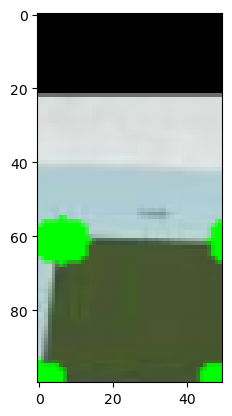

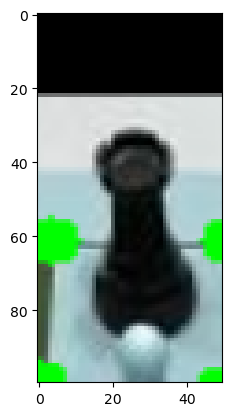

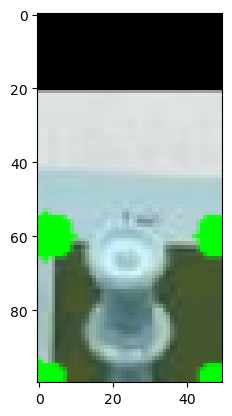

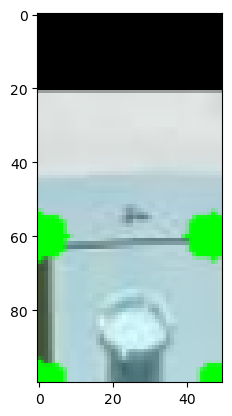

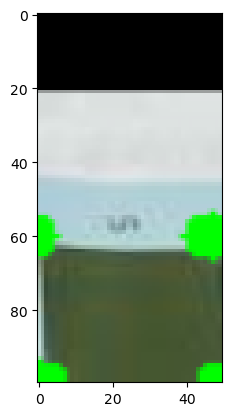

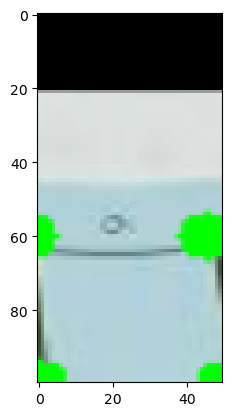

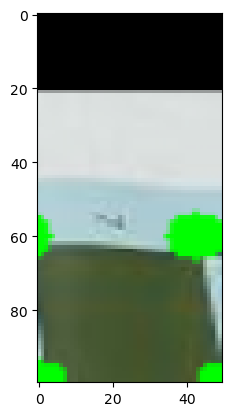

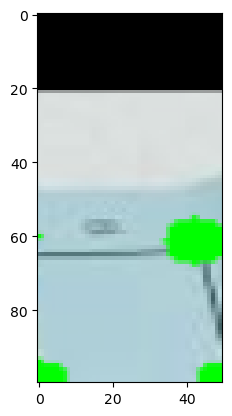

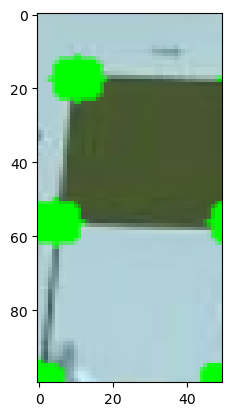

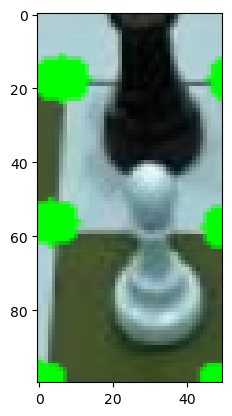

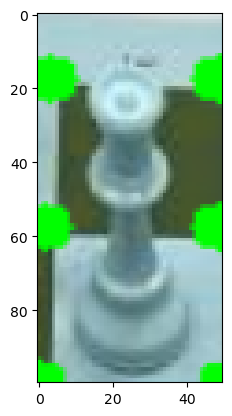

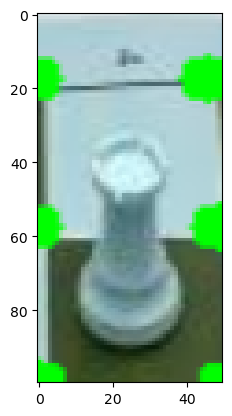

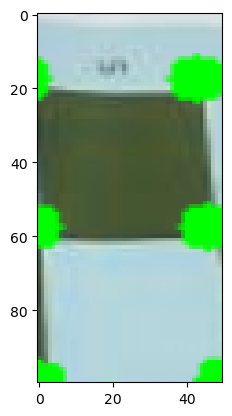

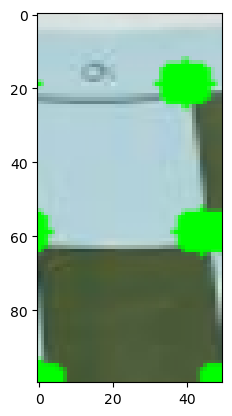

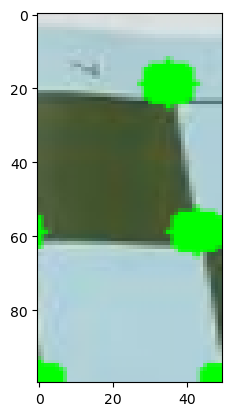

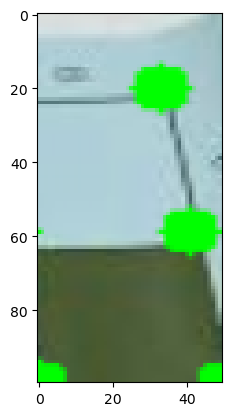

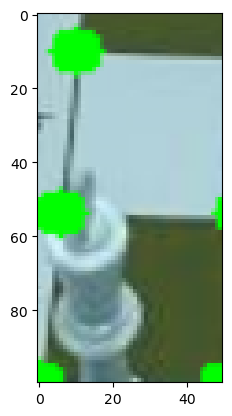

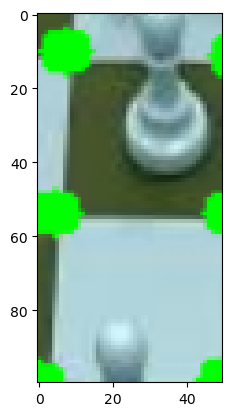

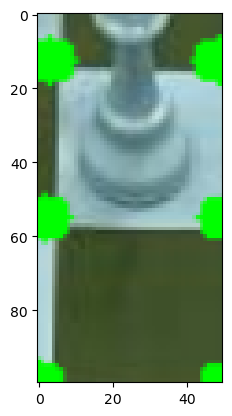

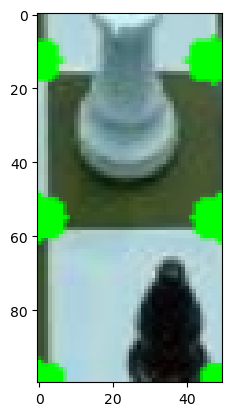

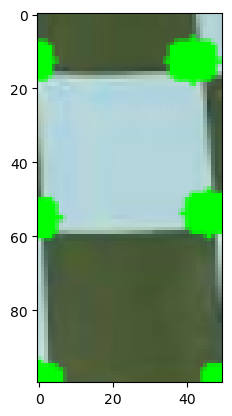

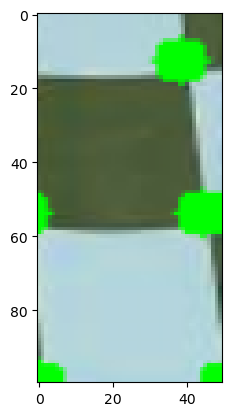

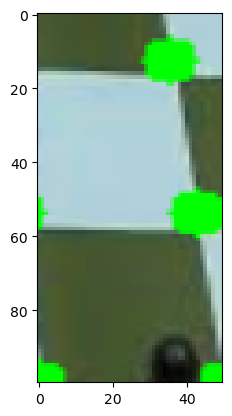

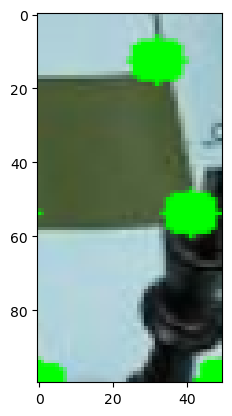

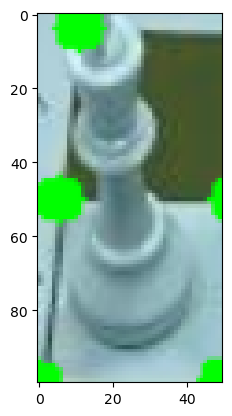

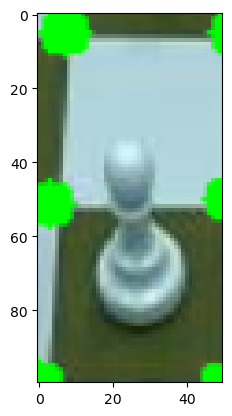

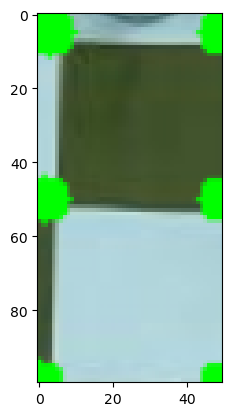

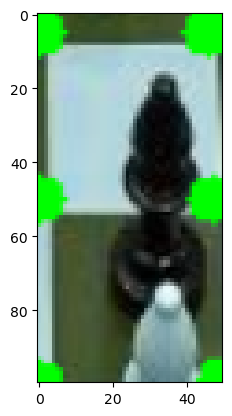

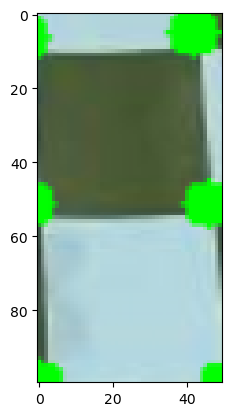

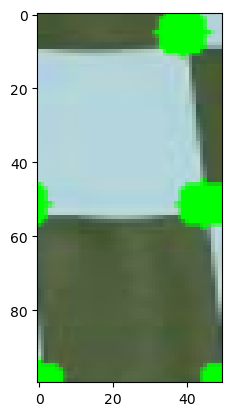

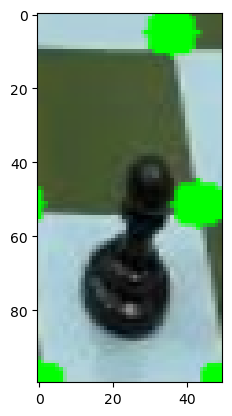

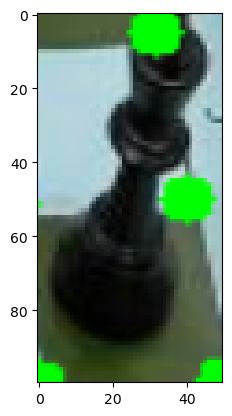

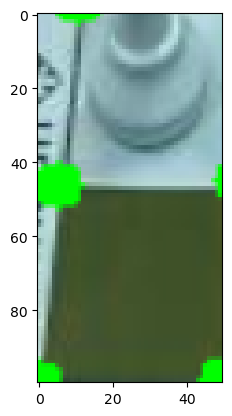

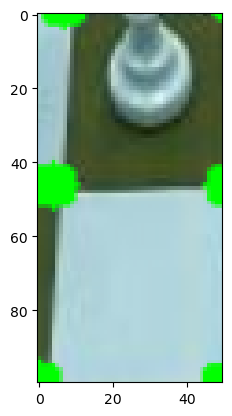

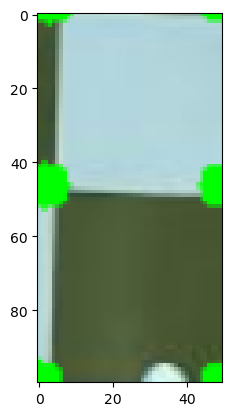

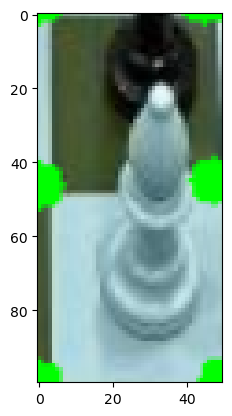

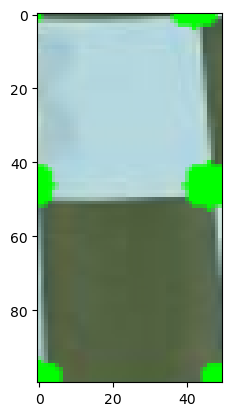

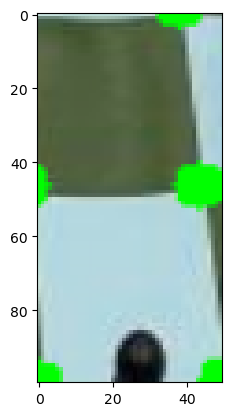

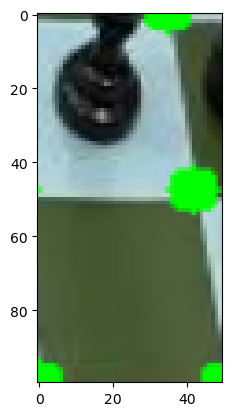

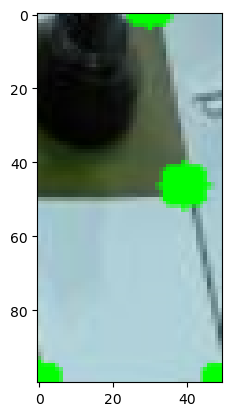

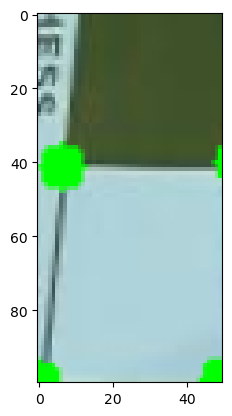

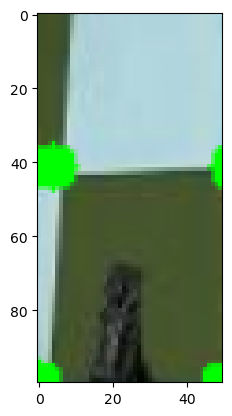

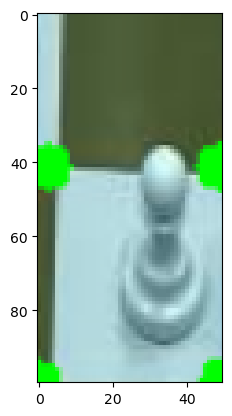

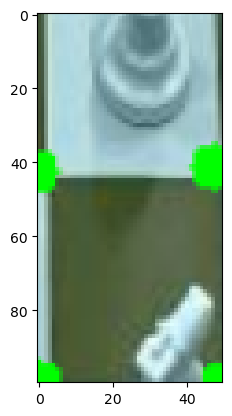

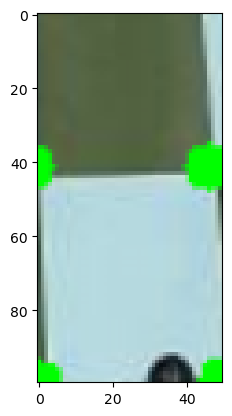

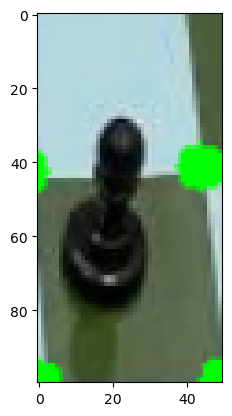

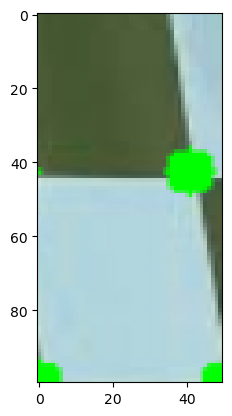

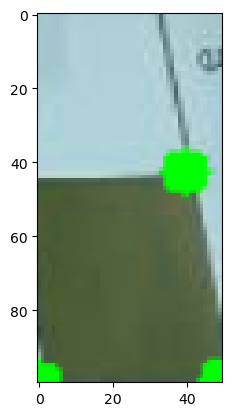

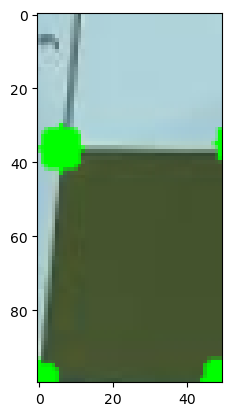

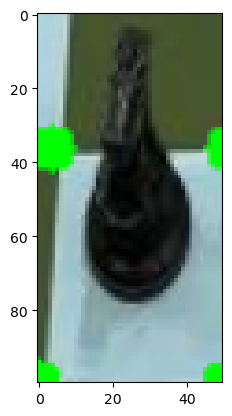

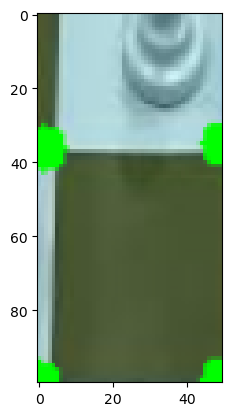

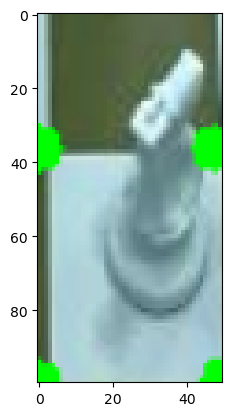

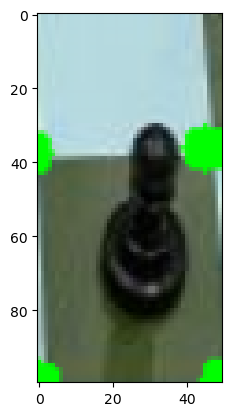

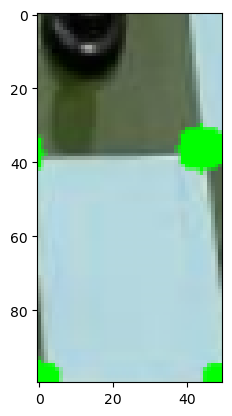

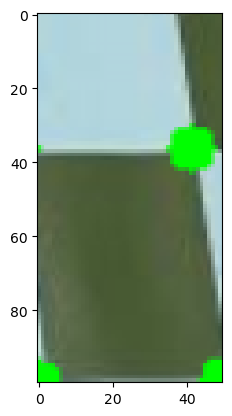

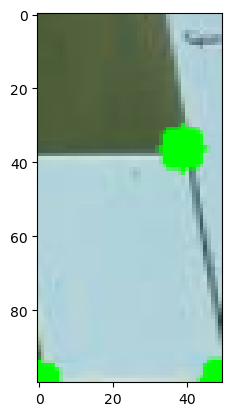

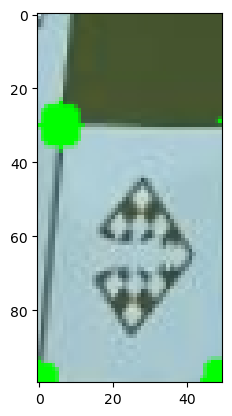

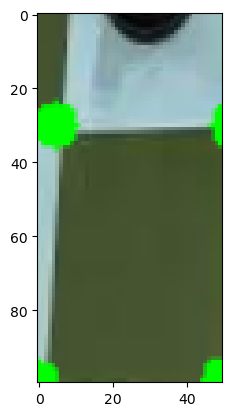

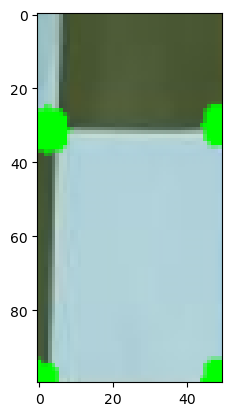

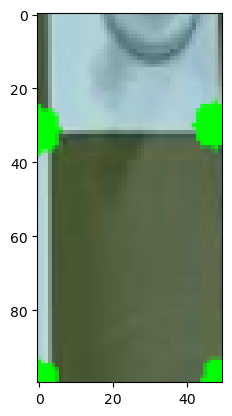

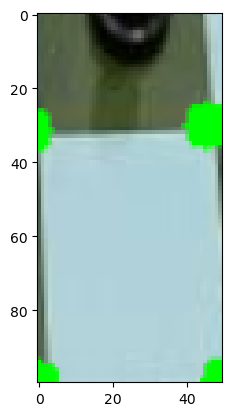

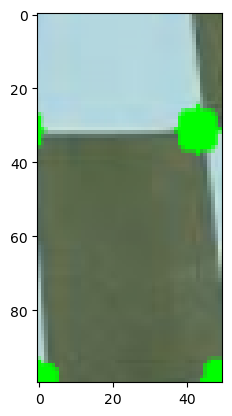

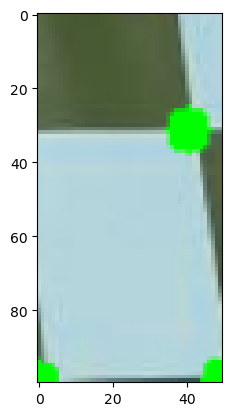

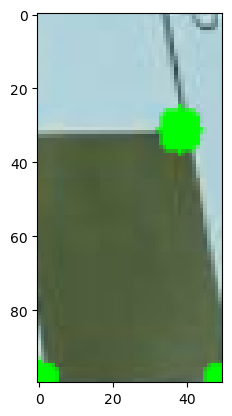

In [33]:
model = Net()
model.load_state_dict(torch.load("classification_chess.pth"))

def get_preds_with_constraints(dictionary, threshold=0.88):
    model.eval()
    map2 = {0: 'brak', 1: 'czarny_goniec', 2: 'czarny_krol', 3: 'czarny_kon', 4: 'czarny_pionek', 
            5: 'czarna_królowa', 6: 'czarna_wieża', 7: 'biały_goniec', 8: 'biały_król', 
            9: 'biały_koń', 10: 'biały_pionek', 11: 'biała_królowa', 12: 'biała_wieża'}
    
    expected_counts = {
        4: 8,  
        3: 2,  
        1: 2,  
        6: 2,  
        5: 1,  
        2: 1,  
        10: 8,  
        9: 2,  
        7: 2,  
        12: 2,  
        11: 1,  
        8: 1,  
    }
    
    assigned_counts = {key: 0 for key in expected_counts.keys()}
    
    all_probs = []
    square_keys = list(dictionary.keys())
    with torch.no_grad():
        for idx, key in enumerate(square_keys):
            plt.figure()
            plt.imshow(torch.tensor(dictionary[key][0]))
            image = torch.tensor(dictionary[key][0])
            image = image.permute(2, 0, 1)
            image = image.unsqueeze(0)
            output = model(image)
            probabilities = F.softmax(output, dim=1).squeeze(0)
            for piece_idx, prob in enumerate(probabilities):
                all_probs.append((prob.item(), idx, piece_idx))  
    

    all_probs.sort(reverse=True, key=lambda x: x[0])  
    

    final_assignments = {key: map2[0] for key in square_keys}  
    assigned_squares = set()
    
    for prob, square_idx, piece_idx in all_probs:
        if prob < threshold or piece_idx == 0:  
            continue
        if assigned_counts[piece_idx] < expected_counts.get(piece_idx, 0) and square_idx not in assigned_squares:
            final_assignments[square_keys[square_idx]] = map2[piece_idx]
            assigned_counts[piece_idx] += 1
            assigned_squares.add(square_idx)
    
    for key in square_keys:
        if key not in final_assignments or final_assignments[key] == map2[0]:
            final_assignments[key] = map2[0]
    
    board_size = int(len(square_keys) ** 0.5)
    for i in range(board_size):
        print([(i, final_assignments[square_keys[j]]) for j in range(i * board_size, (i + 1) * board_size)])

get_preds_with_constraints(get_image_crops(r"C:\Users\piotr\OneDrive\Dokumenty\Widzenie Komputerowe\test\d7887071e972604ddf5940d8eb2702e7_jpg.rf.5f20fe9a6c746d488d6d0478828478cb.jpg"))